<a href="https://colab.research.google.com/github/IYashCanCode/IYashCanCode/blob/main/Advance_Linear_Regression_withoutcode_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Advance Regression Techniques <center>

In this assignment you will learn a lot on various advance regression techniques like lasso, ridge, ElasticNet, polynomial regression, and also you will learn hyperparameter tuning technique called GridSearchCV

   So buddy role up your sleeves and get ready for various fun activities
    
## **`Problem statement: Car Price Prediction`** 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variable
<br>
<br>
<br>

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration
<p style='text-align: right;'> points= 20</p>


Let's first have a look at the dataset and understand the size, attribute names etc.

In [ ]:
# Importing necessary libraries numpy, pandas, pyplot, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as TTS
# import linear_model, LinearRegression, Ridge, lasso, GridSearchCV from sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV as GSC
# import os
import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# reading the CarPrice_Assignment
cars = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
# summary of the dataset: 205 rows, 26 columns, no null values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


 0. car_ID: Unique id of each observation (Interger)                   
 1. symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)                
 2. CarName:Name of car company (Categorical)                
 3. fueltype:Car fuel type i.e gas or diesel (Categorical)                 
 4. aspiration:Aspiration used in a car (Categorical)               
 5. doornumber:Number of doors in a car (Categorical)               
 6. carbody:body of car (Categorical)                  
 7. drivewheel:type of drive wheel (Categorical)               
 8. enginelocation:Location of car engine (Categorical)           
 9. wheelbase:Weelbase of car (Numeric)               
 10. carlength:Length of car (Numeric)               
 11. carwidth: Width of car (Numeric)                
 12. carheight: Height of car(Numeric)               
 13. curbweight:The weight of a car without occupants or baggage. (Numeric)               
 14. enginetype:Type of engine. (Categorical)               
 15. cylindernumber:cylinder placed in the car (Categorical)           
 16. enginesize:Size of car (Numeric)               
 17. fuelsystem: Fuel system of car (Categorical).               
 18. boreratio:Boreratio of car (Numeric)               
 19. stroke: Stroke or volume inside the engine (Numeric).                
 20. compressionratio: Compression ratio of car (Numeric)        
 21. horsepower:Horsepower (Numeric)               
 22. peakrpm:Car peak rpm (Numeric)                  
 23. citympg:Mileage in city (Numeric)                  
 24. highwaympg:Mileage on highway (Numeric)               
 25. price:Price of car (Numeric)    

#### Understanding the unique value distribution

Here we will check various attributes in a feature and its contribution in the dataset.

In [ ]:
#Check each symboling attribute's count
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

From above output we can see that symboling parameter in cars daraset shows -2 (least risky) to +3 most risky but most of the cars are 0,1,2.


In [ ]:
#Check each aspiration attribute's count
cars['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

aspiration: An (internal combustion) engine property showing whether the oxygen intake is through standard (atmospheric pressure)or through turbocharging (pressurised oxygen intake)

In [ ]:
#Check each drivewheel attribute's count
cars['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

drivewheel: frontwheel, rarewheel or four-wheel drive 

Now plot distribution plot for **wheelbase**: distance between centre of front and rarewheels


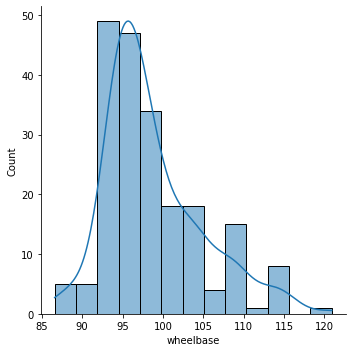

In [ ]:
# plot wheetbase distribution
sns.displot(x = 'wheelbase',data = cars,kde=True)
plt.show()

plot distribution plot for **curbweight**: weight of car without occupants or baggage


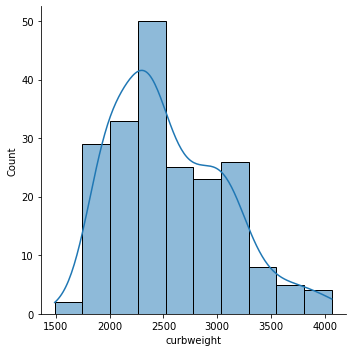

In [ ]:
# plot curbweight distribution
sns.displot(cars['curbweight'],kde=True)
plt.show()

plot distribution plot for **stroke**: volume of the engine (the distance traveled by the piston in each cycle)

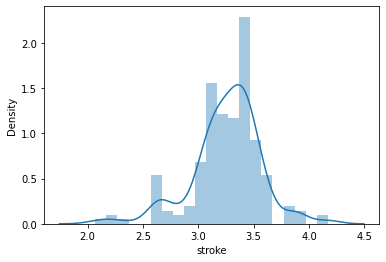

In [ ]:
# plot stroke dsitribution
sns.distplot(cars['stroke'],kde=True)
plt.show()

Now plot distribution plot for **compressionration**: ratio of volume of compression chamber at largest capacity to least capacity

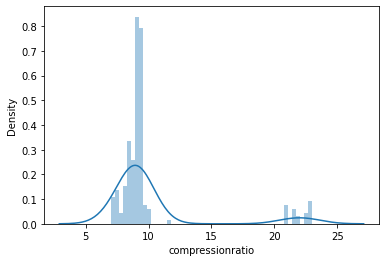

In [ ]:
# plot compressionratio distribution
sns.distplot(cars['compressionratio'],kde=True)
plt.show()

Now lets see distribution plot for target variable: **price** of car


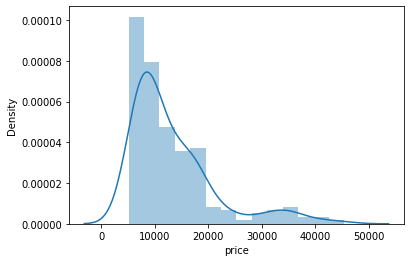

In [ ]:
# Price distribution
sns.distplot(cars['price'],kde=True)
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [ ]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars[cars.columns[cars.dtypes != 'object']]
#head
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [ ]:
# dropping symboling and car_ID 
cars_numeric.drop(['car_ID','symboling'],axis=1,inplace=True)



In [ ]:
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now make a pairwise scatter plot and observe linear relationships.

In [ ]:
# paiwise scatter plot
#sns.pairplot(cars_numeric)
#plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

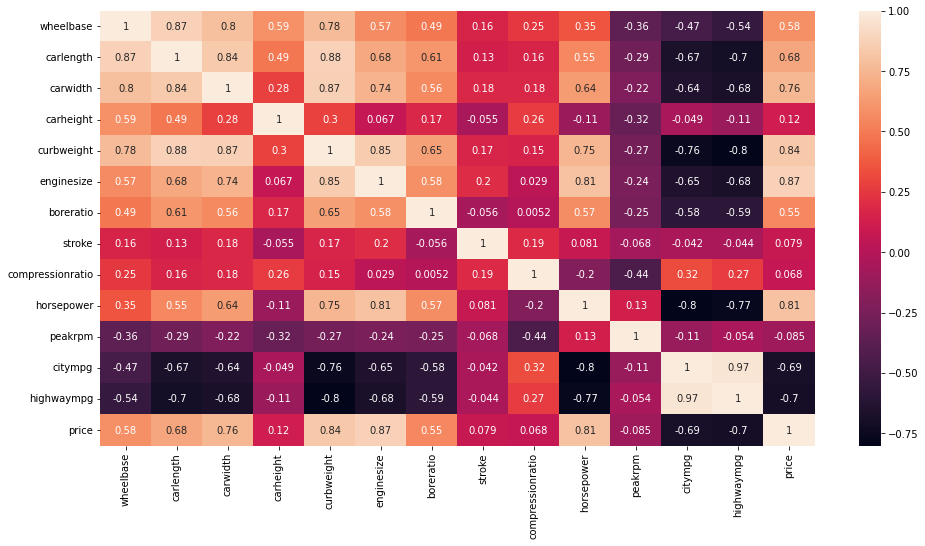

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cars_numeric.corr(),annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

<p style='text-align: right;'> points= 15</p>


Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [ ]:
# variable formats

In [ ]:
# converting symboling to categorical by changing its datatype to  
cars['symboling'] = cars['symboling'].astype(str) 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Next, we need to extract the company name from the column ```CarName```. 

In [ ]:
# CarName: first few entries (upto 30)
cars['CarName'].head(30)

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.




In [ ]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x : x.split(" ")[0])

# Print CarName: first few entries (upto 30)

carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [ ]:
# Method 2: Use regular expressions
import re
# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile("^\w+-?\w+")

#apply above regex pattern to CarName
carnames = cars['CarName'].apply(lambda x : re.findall(p,x)[0])


In [ ]:
carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

Let's create a new column to store the compnay name and check whether it looks okay.

In [ ]:
# New column car_company
cars['car_company'] = carnames


In [ ]:
# look at all values 
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

Notice that **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [ ]:
# replacing misspelled car_company names using loc

# volkswagen
cars.loc[cars.car_company=='vw', 'car_company'] = 'volkswagen'
cars.loc[cars.car_company=='vokswagen', 'car_company'] = 'volkswagen'
# porsche
cars.loc[cars.car_company=='porcshce','car_company']='porsche'
# toyota
cars.loc[cars.car_company=='toyouta','car_company']='toyota'
# nissan
cars.loc[cars.car_company=='Nissan','car_company']='nissan'
# mazda
cars.loc[cars.car_company=='maxda','car_company']='mazda'

In [ ]:
# print catgeorywise car company value counts
cars.car_company.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [ ]:
# drop carname variable
cars.drop('CarName',axis=1,inplace=True)


In [ ]:
# car basic information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
# cars statistical discription
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Data Preparation 

<p style='text-align: right;'> points= 8</p>


#### Data Preparation

Let's now prepare the data and build the model.

split into X and y


In [ ]:
#Define X
X = cars.drop('price',axis=1)


# Define y
Y = cars['price']

### Creating dummy variables for categorical variables


In [ ]:
# subset all categorical variables
cars_categorical = cars[cars.columns[cars.dtypes=='object']]


# cars_categorical head
cars_categorical.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical)

# cars_dummies head

cars_dummies.head()

,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop categorical variables from X
cat_list = X.columns[X.dtypes=='object']
X = X.drop(cat_list,axis=1)


In [ ]:
# concat dummy variables with X
X = pd.concat([X,cars_dummies],axis=1)
X

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,0,0,1
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,0,0,1
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,0,0,1
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,0,0,1


## Scaling the features

<p style='text-align: right;'> points= 4</p>


In [ ]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns


# scaling X and converting to Dtaframe
X = pd.DataFrame(np.array(scale(X)))
X


#renaming X columns as cols
X.columns = cols
X.drop('car_ID',axis=1,inplace=True)
#print columns in X
X.columns


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl'

### Splitting into test train

<p style='text-align: right;'> points= 1</p>


In [ ]:
# split into train and test with train_size=70% and random_state=100
Xtrain, Xtest, Ytrain, Ytest = TTS(X,Y,test_size=0.3,random_state=100)


# 3. Model Building and Evaluation

<p style='text-align: right;'> points= 30</p>

Reference site: https://towardsdatascience.com/linear-regression-models-4a3d14b8d368



### **`Reference video below for advance linear regression tutorial`**

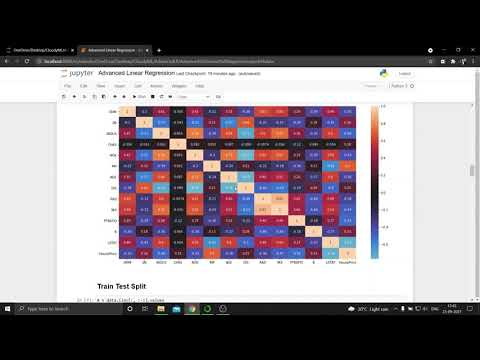

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kGRE_5kf22Y',width=700, height=400)

## Ridge, Lasso and ElasticNet Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge, lasso and elasticNet regression.


To understand there differences please check: https://medium.com/analytics-vidhya/understanding-difference-between-regularization-methods-ridge-lasso-and-elasticnet-in-python-996185296ed2

## Ridge Regression



In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()



# defining cross validation folds as 5
folds = 5


#### Cross validation and Hyperparameter tuning: GridSearchCV

initialising GridSearchCV function with folowing attributes:

    estimator = ridge
    param_grid = params
    scoring= 'neg_mean_absolute_error'
    cv = folds
    return_train_score=True
    verbose = 1

In [ ]:
# Define GridSearchCV
model_cv = GSC(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,verbose=1,return_train_score=True).fit(Xtrain,Ytrain)
          

# fit GridSearchCV() with X_train and y_train
model_cv

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Save GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(model_cv.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]


# cv_results head
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005560,0.001376,0.003524,0.000179,0.0001,{'alpha': 0.0001},-2733.850448,-1464.535610,-1531.664643,-3504.279639,...,-2328.591661,766.102898,26,-694.731353,-814.195642,-832.366039,-903.777846,-720.177067,-793.049589,76.459880
1,0.004781,0.000336,0.003700,0.000227,0.001,{'alpha': 0.001},-2731.307776,-1463.518500,-1532.579011,-3482.142712,...,-2323.912902,759.126941,25,-694.966998,-813.973109,-831.902796,-903.315622,-719.895629,-792.810831,76.259262
2,0.004509,0.000149,0.003356,0.000296,0.01,{'alpha': 0.01},-2707.753027,-1453.825034,-1541.103544,-3318.482069,...,-2288.673369,708.490834,24,-697.106995,-812.410301,-827.575617,-899.018748,-717.796890,-790.781710,74.348612
3,0.005883,0.002561,0.003528,0.000412,0.05,{'alpha': 0.05},-2632.700739,-1419.161600,-1568.924281,-3040.431922,...,-2222.319638,626.373699,23,-707.633557,-812.949973,-817.325545,-887.885513,-711.387917,-787.436501,68.972738
4,0.004399,0.000050,0.003226,0.000102,0.1,{'alpha': 0.1},-2586.560362,-1407.967774,-1590.059368,-2874.704691,...,-2182.707375,577.432791,22,-717.267752,-816.434582,-809.092571,-883.342625,-709.007391,-787.028984,65.699021
5,0.004513,0.000156,0.003255,0.000152,0.2,{'alpha': 0.2},-2536.602059,-1397.036278,-1612.001657,-2707.543361,...,-2135.694440,527.536357,21,-727.090877,-824.897331,-808.734492,-884.208360,-711.270825,-791.240377,64.175023
6,0.004415,0.000038,0.003261,0.000083,0.3,{'alpha': 0.3},-2517.842512,-1391.823797,-1621.905680,-2601.278523,...,-2103.113635,497.160143,20,-733.003474,-830.301847,-809.735560,-886.273104,-717.766944,-795.416186,62.612754
7,0.004678,0.000454,0.003419,0.000236,0.4,{'alpha': 0.4},-2506.900157,-1388.190470,-1626.214050,-2539.287186,...,-2079.895691,478.483603,19,-736.786230,-835.610340,-810.106480,-890.114789,-723.726026,-799.268773,62.132019
8,0.004853,0.000249,0.003350,0.000069,0.5,{'alpha': 0.5},-2500.948185,-1383.561415,-1627.423364,-2488.567974,...,-2059.530277,464.550696,18,-739.372528,-840.845729,-812.103564,-892.772547,-728.294196,-802.677713,61.972861
9,0.004988,0.000519,0.004970,0.002438,0.6,{'alpha': 0.6},-2497.521402,-1379.993959,-1626.733493,-2443.311596,...,-2041.521206,453.164814,17,-741.251539,-846.402144,-814.308775,-894.468053,-731.739945,-805.634091,62.022923


#### plotting mean test and train scores with alpha 


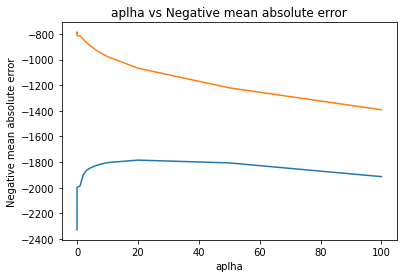

In [ ]:
# change datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype(int)
# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.xlabel('aplha')
plt.ylabel('Negative mean absolute error')
plt.title('aplha vs Negative mean absolute error')
plt.show()

In [ ]:
# checking best alpha from model_cv
model_cv.best_params_

{'alpha': 20}

As you can see that trai and test scores start to become parallel to each other after apha crosses 10. 
So lets check our ridge model on alpha 10.

In [ ]:
#sel alpha as 10
alpha = 20

# Initialise Ridge() with above alpha
ridge = Ridge(alpha = alpha)

#fit model
model = ridge.fit(Xtrain,Ytrain)


#print ridge coeficients
model.coef_

array([ 5.39264928e+02,  2.89202385e+02,  1.16455013e+03, -1.93963553e+02,
        1.00151985e+03,  1.03840833e+03,  2.64457748e+02, -9.64892830e+01,
        3.19896396e+01,  8.77449765e+02,  4.35678230e+02,  1.29434897e+01,
       -2.83499603e+01,  5.45050225e+01, -3.11080083e+02,  6.22793159e+01,
       -2.85072824e+01, -1.11847882e+01,  2.33298013e+01,  1.28981674e+02,
       -1.28981674e+02, -2.70801789e+02,  2.70801789e+02, -1.43166905e+01,
        1.43166905e+01,  4.84978275e+02,  3.04847522e+01, -1.43622479e+02,
        4.04538675e+00, -6.58956447e+01, -2.48391775e+01, -3.00097897e+02,
        3.16634851e+02, -5.58869269e+02,  5.58869269e+02, -2.26556513e+02,
       -2.39469936e+02, -2.39074025e+02,  3.66196625e+02, -6.54801205e+00,
       -2.10932042e+02,  1.08698017e+02,  7.79639284e+02, -7.61676037e+01,
       -5.53183446e+02,  2.88986460e+02,  2.75551422e+02,  7.62711661e+00,
        1.08698017e+02, -7.63970085e+01,  3.09574182e+01, -1.66103632e+02,
        1.28981674e+02, -

## Lasso

##### Cross validation and Hyperparameter tuning: GridSearchCV

In [ ]:
# Initialise Lasso()
lasso = Lasso()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be lasso
model_cv = GSC(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True)
#fit model_cv
model_cv.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018061,0.002944,0.003271,0.000498,0.0001,{'alpha': 0.0001},-2367.261791,-1546.022072,-1546.617992,-3472.916673,...,-2243.825048,707.210607,27,-701.703112,-813.107455,-827.282645,-900.383648,-716.429524,-791.781277,73.893965
1,0.013233,0.001397,0.002452,0.000183,0.001,{'alpha': 0.001},-2367.381841,-1545.711826,-1546.632646,-3472.535319,...,-2243.678711,707.138500,26,-701.707087,-813.103490,-827.273610,-900.375758,-716.426648,-791.777319,73.890166
2,0.014363,0.002086,0.002547,0.000154,0.01,{'alpha': 0.01},-2368.711480,-1542.606280,-1546.777573,-3468.724766,...,-2242.248983,706.426897,25,-701.748324,-813.066300,-827.183259,-900.296854,-716.399626,-791.738873,73.851608
3,0.012639,0.000399,0.002401,0.000048,0.05,{'alpha': 0.05},-2377.273146,-1528.825665,-1547.088212,-3451.764566,...,-2236.497576,703.485693,24,-701.961019,-812.956356,-826.833196,-899.960980,-716.301233,-791.602557,73.681240
4,0.012257,0.000367,0.002337,0.000042,0.1,{'alpha': 0.1},-2391.590708,-1508.846840,-1547.546663,-3430.334198,...,-2230.180075,700.647021,22,-702.284835,-812.762892,-826.441874,-899.563088,-716.198991,-791.450336,73.457813


#### plotting mean test and train scores with alpha 


Text(0.5, 1.0, 'aplha vs Negative absolute error')

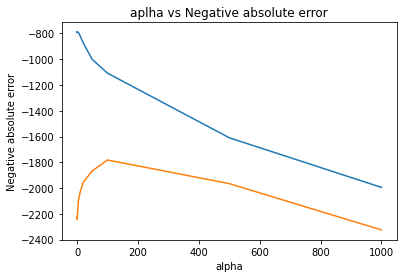

In [ ]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype(int)
# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative absolute error')
plt.title('aplha vs Negative absolute error')

In [ ]:
# Checking best  alpha from model_cv
model_cv.best_params_

{'alpha': 100}

As you can see that trai and test scores start to become parallel to each other after apha crosses 100. So lets check our Lasso model on alpha 100.

In [ ]:
# St alpha =100
alpha = 100

# Define lasso with above alpha
lasso = Lasso(alpha = alpha)
  
# fit lasso

lasso.fit(Xtrain,Ytrain)


Lasso(alpha=100)

In [ ]:
# print lasso coeficients
lasso.coef_


array([ 0.00000000e+00,  0.00000000e+00,  1.97939938e+03, -0.00000000e+00,
        1.76831443e+03,  7.55101010e+02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  6.98282188e+02,  2.18359881e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.98197351e+02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40280506e+02,
       -2.30368145e-12, -2.77486073e+02,  1.01181303e-13, -0.00000000e+00,
        0.00000000e+00,  4.86123878e+02,  0.00000000e+00, -0.00000000e+00,
        3.51152575e+01, -3.91405942e+01,  0.00000000e+00, -9.61167523e+01,
        2.90182014e+02, -1.44332667e+03,  0.00000000e+00, -0.00000000e+00,
       -3.69113996e+01, -0.00000000e+00,  2.08413296e+01, -0.00000000e+00,
       -0.00000000e+00,  5.77549327e+01,  3.51353750e+02,  0.00000000e+00,
       -3.48033405e+02, -0.00000000e+00,  1.92577833e+02, -0.00000000e+00,
        1.00588403e+01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        5.95954646e+01, -

# ElasticNet Regression

##### Cross validation and Hyperparameter tuning: GridSearchCV

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialise ElasticNet()
elasticnet = ElasticNet()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be ElasticNet
model_cv = GSC(estimator=elasticnet,param_grid=params,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True)


#fit model_cv

model_cv.fit(Xtrain,Ytrain)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016990,0.003190,0.003314,0.000730,0.0001,{'alpha': 0.0001},-2385.711208,-1532.587882,-1550.735066,-3370.608936,...,-2225.828726,674.755149,17,-702.659529,-812.505684,-825.765638,-898.368730,-715.453233,-790.950563,73.089710
1,0.015662,0.003922,0.002622,0.000278,0.001,{'alpha': 0.001},-2492.288972,-1449.070967,-1579.458994,-2821.380423,...,-2132.792778,531.555185,15,-711.849481,-813.303061,-815.003972,-886.708128,-710.221339,-787.417196,67.763526
2,0.013623,0.000550,0.002429,0.000070,0.01,{'alpha': 0.01},-2497.865332,-1380.426462,-1627.000709,-2454.559305,...,-2045.845762,455.971203,13,-740.759664,-844.889413,-813.723776,-894.113825,-730.969717,-804.891279,61.993206
3,0.007446,0.000926,0.002469,0.000088,0.05,{'alpha': 0.05},-2517.186387,-1373.740991,-1608.876237,-1986.668089,...,-1870.244038,386.509396,11,-775.485546,-904.555232,-887.650766,-944.362714,-792.279240,-860.866700,65.714290
4,0.005721,0.000104,0.002346,0.000084,0.1,{'alpha': 0.1},-2553.723352,-1383.512551,-1650.343979,-1808.237084,...,-1831.103573,390.080073,10,-810.842804,-966.198594,-949.753430,-999.420907,-857.550607,-916.753268,70.837520


#### plotting mean test and train scores with alpha

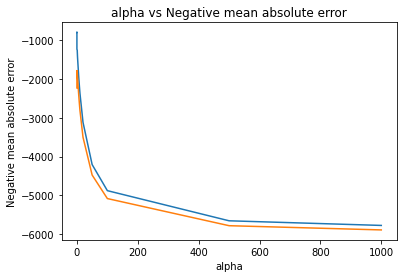

In [ ]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype(int)
# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('alpha vs Negative mean absolute error')
plt.show()

In [ ]:
# Checking best  alpha from model_cv
model_cv.best_params_

{'alpha': 0.6}

As you can see that train and test scores start to become parallel to each other after apha crosses 0.2. So lets check our Elastic model on alpha 0.2.

In [ ]:
# St alpha =0.2
alpha =0.6

# Define lasso with above alpha
elasticnet = ElasticNet(alpha=alpha)
  
# fit lasso
elasticnet.fit(Xtrain,Ytrain)


ElasticNet(alpha=0.6)

In [ ]:
# print lasso coeficients

elasticnet.coef_

array([ 450.6883542 ,  367.52519545,  930.22168627,  -91.88036462,
        820.98886284,  881.28612308,  289.48839537,  -33.08280156,
         75.28381422,  747.4002887 ,  236.5226385 , -138.82948644,
       -162.99671208,   70.07398162, -260.70712014,   55.69325039,
        -57.20359602,  -47.68507932,   76.30892691,  123.54562102,
       -123.54753819, -215.49065489,  215.49214315,  -39.24171501,
         39.23919116,  402.29854766,   81.92020628, -167.22185662,
         54.73543796,  -97.02319841,  -56.45090673, -346.25560631,
        377.57567854, -484.36021922,  484.36043969, -146.04785231,
        -71.34491537, -231.89961868,  263.52043521,  -26.5127528 ,
        -95.23921495,   44.82283201,  673.82241683,   36.74192496,
       -582.24436918,  318.21273518,  208.82062097,  101.34143294,
         44.81733481,  -67.76713747,  -61.32696734, -128.04017349,
        123.56249742,   -0.        ,  105.0803095 , -143.98271177,
         -0.        ,   79.42843045,  131.80827617, 1150.29203

### Model evaluation

<p style='text-align: right;'> points= 5</p>

Lets compare all three model result using error term . Here we will check RMSE.



In [ ]:
# Calculate all 3 predictions 
pred_r = ridge.predict(Xtest)
pred_l = lasso.predict(Xtest)
pred_en = elasticnet.predict(Xtest)

In [ ]:
# import mean_squared_error module
from sklearn.metrics import mean_squared_error as MSE

# print RMSE for all 3 techniques
print("RMSE of ridge : {0}".format(np.sqrt(MSE(pred_r,Ytest))))
print("RMSE of lasso : {0}".format(np.sqrt(MSE(pred_l,Ytest))))
print("RMSE of elasticnet : {0}".format(np.sqrt(MSE(pred_en,Ytest))))

RMSE of ridge : 2302.2948183062326
RMSE of lasso : 2398.8455114113735
RMSE of elasticnet : 2431.240360911597


As you can see for our problem statement Ridge as a regularization technique gave us the best result

## Generalised Regression using Polynomial regression

<p style='text-align: right;'> points= 18</p>

In this section, we will build a generalised regression model on the electricity consumption dataset. The dataset contains two variables - year and electricity consumption.

Refrence: https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/?


In [ ]:
#importing libraries PolynomialFeatures, LinearRegression, Pipeline  , metrics from sklearn
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
#fetching data
elec_cons = pd.read_csv('total-electricity-consumption-us.csv')

In [ ]:
# number of observations: 51
elec_cons.shape

(51, 2)

In [ ]:
# checking NA
# there are no missing values in the dataset
elec_cons.isna().sum()

Year           0
Consumption    0
dtype: int64

In [ ]:
#Defining length of elec_cons index
size = elec_cons.shape[0]
print(size)
# Defining custom index which ranges from 0 to size and step size as  5
index = range(0,size,5)

#train will not have same index which is is defined above
train = elec_cons[~elec_cons.index.isin(index)]

#test will have same index which is is defined above
test = elec_cons[elec_cons.index.isin(index)]


51


In [ ]:
#print train and test length
print(train.shape[0])
test.shape[0]


40


11

In [ ]:
# converting X to a two dimensional array, as required by the learning algorithm
#Making X_train two dimensional
X_train = np.array(train[['Year']])

#Defining y_train
y_train = np.array(train['Consumption'])

#Making X_test two dimensional
X_test = np.array(test[['Year']])

#Defining y_test
y_test = np.array(test['Consumption'])

Doing a polynomial regression: Comparing linear, quadratic and cubic fits

Pipeline helps you associate two models or  s to be built sequentially with each other, in this case, the  s are PolynomialFeatures() and LinearRegression()

In [ ]:
# Defining empty array r2_train and r2_test
r2_train = []
r2_test = []

#Define degrees as list with 1,2 and 3 as elements
degrees = [1,2,3]



Check its library: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

### **`Reference video below for pipeline`**

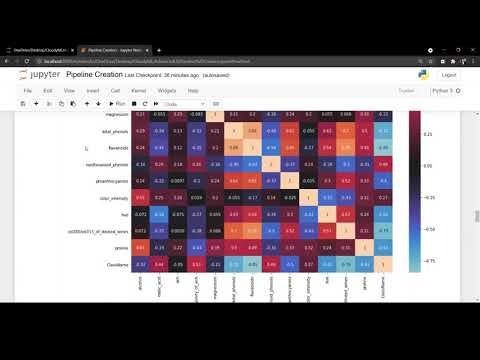

In [ ]:
YouTubeVideo('DbKncMPQhoA',width=700, height=400)

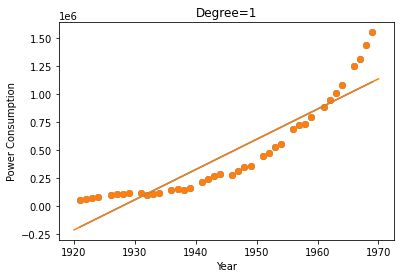

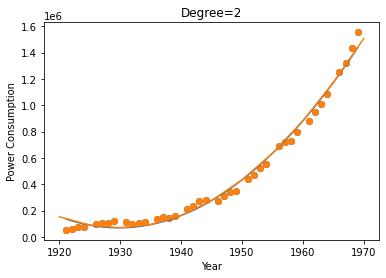

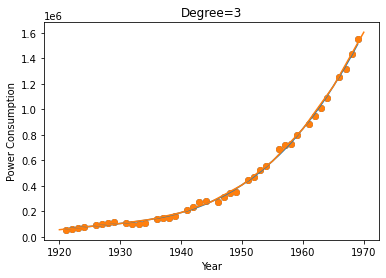

In [ ]:
# Iterating over each degree value

for degree in degrees:
  line = Pipeline([('PF',PF(degree=degree)),('LR',LR())])
  line.fit(X_train,y_train)
  y_pred_test = line.predict(X_test)
  r2_test.append(r2_score(y_pred_test,y_test))
  y_pred_train = line.predict(X_train)
  r2_train.append(r2_score(y_train,y_pred_train))

  fig , ax = plt.subplots()
  ax.scatter(X_train,y_train)
  ax.plot(X_train,y_pred_train)
  ax.scatter(X_train,y_train)
  ax.plot(X_test,y_pred_test)
  ax.set_title("Degree="+str(degree))
  ax.set_xlabel('Year')
  ax.set_ylabel('Power Consumption')
  plt.show()

In [ ]:
# respective test r-squared scores of predictions
print(r2_train)
r2_test


[0.8423747402176137, 0.9908896744553399, 0.9979789881922152]


[0.7541009810885405, 0.9862705615079461, 0.9984520398079032]

As you can see that as polynomial degree increases accuracy also increases. But degree should also be decided based on checking condition of of underfitting and overtting.

If you wanna check difference between simple, multiple and polynomial regression then watch: https://youtu.be/i_9dsEqn5h0


### **`Reference video below for difference between simple, multiple, and polynomial regression`**

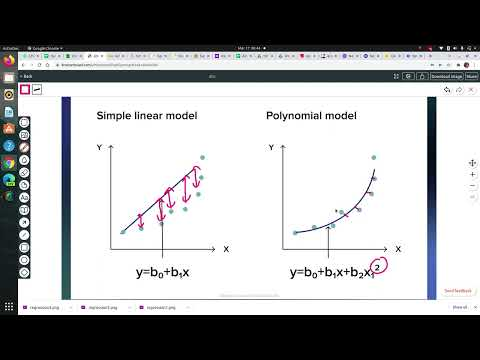

In [ ]:
YouTubeVideo('i_9dsEqn5h0',width=700, height=400)

# **`Summary:`**

Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.

Lasso: Along with shrinking coefficients, lasso performs feature selection as well. some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

ElasticNet: It is an extension of linear regression that adds regularization penalties to the loss function during training.

Polynomial Regression:It is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial

GridSearchCV: It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.


-----------------------

# Bam! Congratulations You have completed your 11th milestone challenge too!
-----------------
# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form https://forms.gle/NG4QD8ncH8FNF2iB8